### 6.2.1. Решение обыкновенных дифференциальных уравнений
#### 6.2.1.1. Модель экспоненциального роста

In [1]:
# подключаем необходимые пакеты:
import Pkg
Pkg.add("DifferentialEquations")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using DifferentialEquations

# задаём описание модели с начальными условиями:
a = 0.98
f(u,p,t) = a*u
u0 = 1.0

# задаём интервал времени:
tspan = (0.0,1.0)

# решение:
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1278
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
│   exception = ErrorException("Required dependency ModelingToolkit [961ee093-0014-501f-94e3-6117800e7a78] failed to load from a cache file.")
└ @ Base loading.jl:1042


retcode: Success
Interpolation: automatic order switching interpolation
t: 5-element Array{Float64,1}:
 0.0
 0.10042494449239292
 0.35218603951893646
 0.6934436028208104
 1.0
u: 5-element Array{Float64,1}:
 1.0
 1.1034222047865465
 1.4121908848175448
 1.9730384275623003
 2.664456142481452

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


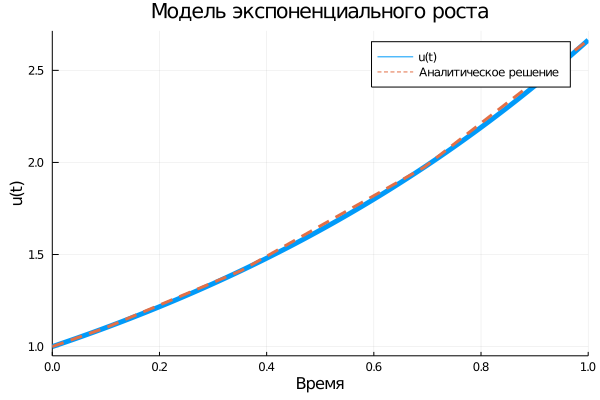

In [3]:
# подключаем необходимые пакеты:
Pkg.add("Plots")
using Plots

# строим графики:
plot(sol, linewidth=5, title="Модель экспоненциального роста", xaxis="Время", yaxis="u(t)", label="u(t)")
plot!(sol.t, t->1.0*exp(a*t), lw=3, ls=:dash, label="Аналитическое решение")

In [4]:
# задаём точность решения:
sol = solve(prob, abstol=1e-8, reltol=1e-8)
println(sol)

retcode: Success
Interpolation: automatic order switching interpolation
t: [0.0, 0.04127492324135852, 0.14679917846877366, 0.28631546412766684, 0.4381941361169628, 0.6118924302028597, 0.7985659100883337, 0.9993516479536952, 1.0]
u: [1.0, 1.0412786454705882, 1.1547261252949712, 1.3239095703537043, 1.5363819257509728, 1.8214895157178692, 2.1871396448296223, 2.662763824115295, 2.664456241933517]


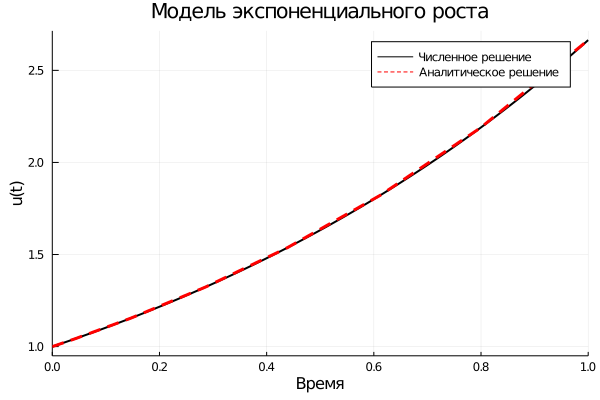

In [5]:
# строим график:
plot(sol, lw=2, color="black", title="Модель экспоненциального роста", xaxis="Время", yaxis="u(t)", label="Численное решение")
plot!(sol.t, t->1.0*exp(a*t), lw=3, ls=:dash, color="red", label="Аналитическое решение")

#### 6.2.1.2. Система Лоренца

In [6]:
using DifferentialEquations, Plots;

# задаём описание модели:
function lorenz!(du,u,p,t)
σ,ρ,β = p
du[1] = σ*(u[2]-u[1])
du[2] = u[1]*(ρ-u[3]) - u[2]
du[3] = u[1]*u[2] - β*u[3]
end

# задаём начальное условие:
u0 = [1.0,0.0,0.0]
# задаём знанчения параметров:
p = (10,28,8/3)
# задаём интервал времени:
tspan = (0.0,100.0)

# решение:
prob = ODEProblem(lorenz!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 1294-element Array{Float64,1}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624077544510573
   0.009058075635317072
   0.01695646895607931
   0.0276899566248403
   0.041856345938267966
   0.06024040228733675
   0.08368539694547242
   0.11336497050342806
   0.14862178548871152
   0.18703974465019643
   ⋮
  99.15166031662457
  99.22514723290307
  99.31227549560941
  99.39403070915297
  99.47001147494375
  99.54379656909015
  99.614651558349
  99.69093823148101
  99.78733023233721
  99.86114450046736
  99.96115759510786
 100.0
u: 1294-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.0010461623302512404]
 [0.8800455868998046, 0.43873645009348244, 0.0034

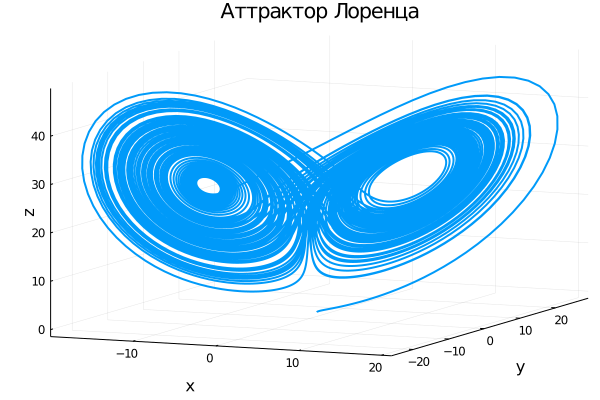

In [7]:
# подключаем необходимые пакеты:
using Plots
# строим график:
plot(sol, vars=(1,2,3), lw=2, title="Аттрактор Лоренца", xaxis="x", yaxis="y", zaxis="z", legend=false)

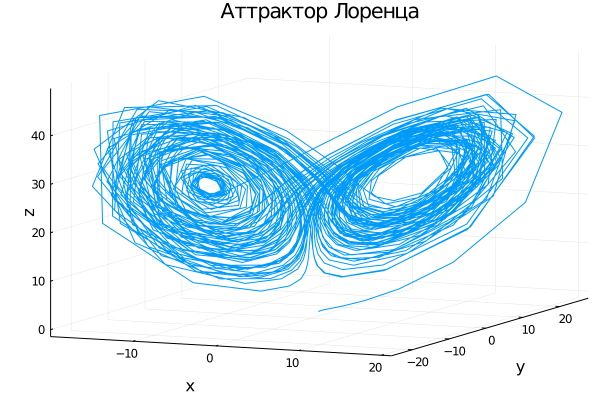

In [8]:
# отключаем интерполяцию:
plot(sol,vars=(1,2,3),denseplot=false, lw=1, title="Аттрактор Лоренца", xaxis="x", yaxis="y", zaxis="z", legend=false)

### 6.2.2. Модель Лотки–Вольтерры

In [9]:
# подключаем необходимые пакеты:
Pkg.add("ParameterizedFunctions")

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [10]:
using ParameterizedFunctions, DifferentialEquations, Plots;
# задаём описание модели:
lv! = @ode_def LotkaVolterra begin
dx = a*x - b*x*y
dy = -c*y + d*x*y
end a b c d

# задаём начальное условие:
u0 = [1.0,1.0]
# задаём знанчения параметров:
p = (1.5,1.0,3.0,1.0)
# задаём интервал времени:
tspan = (0.0,10.0)

# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 34-element Array{Float64,1}:
  0.0
  0.0776084743154256
  0.23264513699277584
  0.4291185174543143
  0.6790821776882875
  0.9444045910389707
  1.2674601253261835
  1.6192913723304114
  1.9869755337814992
  2.264090367186479
  2.5125486490278424
  2.746828248824617
  3.038006827022277
  ⋮
  6.455761908474447
  6.780495751224447
  7.171039674548505
  7.584862904164952
  7.978068388305894
  8.483164907244102
  8.719247868929038
  8.949206527971544
  9.200184813643565
  9.438028630962807
  9.711807852444823
 10.0
u: 34-element Array{Array{Float64,1},1}:
 [1.0, 1.0]
 [1.0454942346944578, 0.8576684823217127]
 [1.1758715885138267, 0.639459570317544]
 [1.4196809607170826, 0.4569962601282084]
 [1.8767193485546056, 0.32473343696185236]
 [2.5882499852859384, 0.26336255804531]
 [3.860708771268753, 0.2794458027885767]
 [5.750812903389158, 0.5220073140479389]
 [6.814978737433837, 1.917783300239219]
 [4.3929977807914105, 4.194

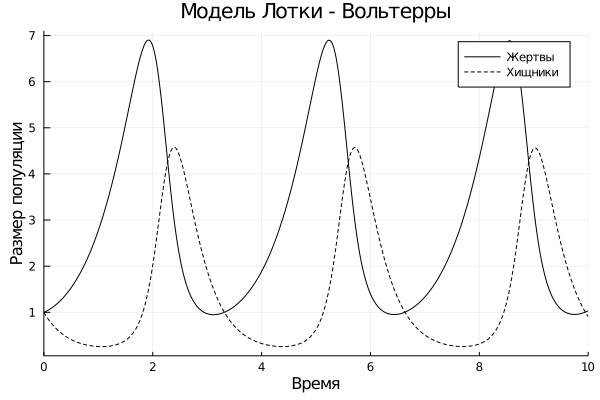

In [11]:
plot(sol, label = ["Жертвы" "Хищники"], color="black", ls=[:solid :dash], title="Модель Лотки - Вольтерры",
    xaxis="Время",yaxis="Размер популяции")

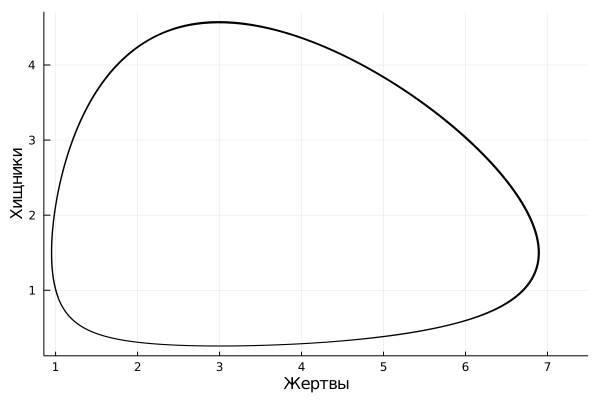

In [12]:
# фазовый портрет:
plot(sol,vars=(1,2), color="black", xaxis="Жертвы",yaxis="Хищники", legend=false)

### 6.4. Задания для самостоятельного выполнения

### 1. Реализовать и проанализировать модель роста численности изолированной популяции (модель Мальтуса):

In [13]:
using ParameterizedFunctions, DifferentialEquations, Plots;

# задаём описание модели:
lv! = @ode_def Malthus begin
    dx = a*x
end a

# задаём начальное условие:
u0 = [2]
# задаём знанчения параметров:
b = 3.0
c = 1.0
p = (b - c)
# задаём интервал времени:
tspan = (0.0, 3.0)

# решение:
prob = ODEProblem(lv!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 12-element Array{Float64,1}:
 0.0
 0.07579340539309044
 0.2176538131796436
 0.3932627681470158
 0.6100444937861662
 0.8636787348395012
 1.154410126539212
 1.478934092373798
 1.8349002173915139
 2.2191346090276505
 2.6287319952831165
 3.0
u: 12-element Array{Array{Float64,1},1}:
 [2.0]
 [2.327358634990142]
 [3.0908767890047213]
 [4.3915079823193475]
 [6.774976637296323]
 [11.25152576490638]
 [20.125039298533256]
 [38.51350387295652]
 [78.48708202618513]
 [169.25236446306522]
 [383.97111795138557]
 [806.8145670244693]

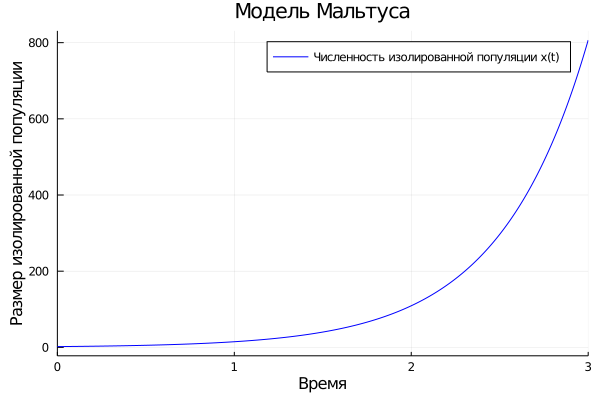

In [14]:
plot(sol, label = "Численность изолированной популяции x(t)", color="blue", ls=[:solid], title="Модель Мальтуса",
    xaxis="Время", yaxis="Размер изолированной популяции")

┌ Info: Saved animation to 
│   fn = /Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/Malthus.gif
└ @ Plots /Users/anastasia/.julia/packages/Plots/YdauZ/src/animation.jl:104


Plots.AnimatedGif("/Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/Malthus.gif")
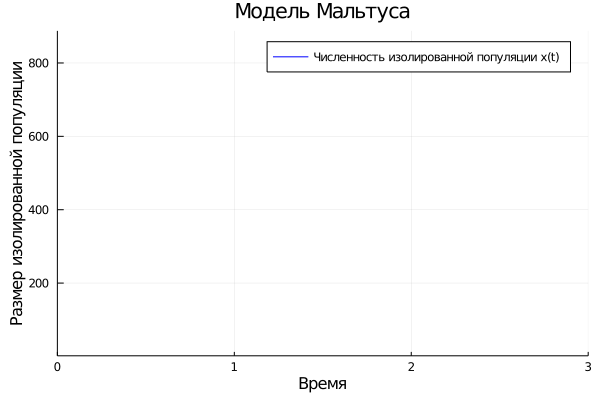

In [15]:
animate(sol, fps=7, "Malthus.gif", label = "Численность изолированной популяции x(t)", color="blue", ls=[:solid], title="Модель Мальтуса",
    xaxis="Время", yaxis="Размер изолированной популяции")

### 2. Реализовать и проанализировать логистическую модель роста популяции, заданную уравнением:

In [16]:
# задаём описание модели:
lv! = @ode_def Logistic_population begin
    dx = r*x*(1 - x/k)
    end r k

# задаём начальное условие:
u0 = [1.0]

# задаём знанчения параметров:
p = (0.9, 20)
# задаём интервал времени:
tspan = (0.0, 10.0)

# решение:
prob = ODEProblem(lv!, u0, tspan, p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 14-element Array{Float64,1}:
  0.0
  0.10320330193850687
  0.3855506045099877
  0.780748965506008
  1.262015691559725
  1.8586158648823017
  2.5749333150313944
  3.4714981889836993
  4.5715292448819005
  5.629313666416045
  6.930090935678242
  8.078262058777629
  9.531766731892224
 10.0
u: 14-element Array{Array{Float64,1},1}:
 [1.0]
 [1.092018818522065]
 [1.3860627615966585]
 [1.9212436077634998]
 [2.8160884736520337]
 [4.3793819898212325]
 [6.963833041109592]
 [10.897149912038733]
 [15.262797199274292]
 [17.86039918649099]
 [19.28300441595892]
 [19.738721261403803]
 [19.928358457440886]
 [19.952936455140726]

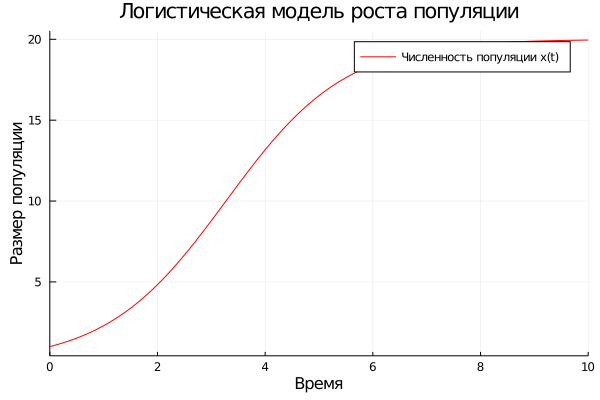

In [17]:
plot(sol, label = "Численность популяции x(t)", color="red", ls=[:solid], title="Логистическая модель роста популяции",
    xaxis="Время", yaxis="Размер популяции")

┌ Info: Saved animation to 
│   fn = /Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/Logistic_population.gif
└ @ Plots /Users/anastasia/.julia/packages/Plots/YdauZ/src/animation.jl:104


Plots.AnimatedGif("/Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/Logistic_population.gif")
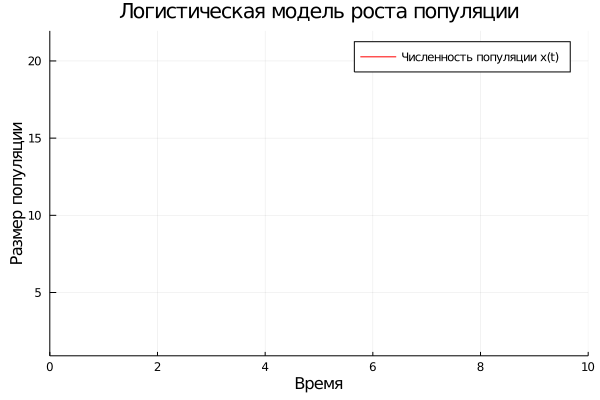

In [18]:
animate(sol, fps=7, "Logistic_population.gif", label = "Численность популяции x(t)", color="red", ls=[:solid], title="Логистическая модель роста популяции",
    xaxis="Время", yaxis="Размер популяции")

### 3. Реализовать и проанализировать модель эпидемии Кермака–Маккендрика (SIRмодель):

In [19]:
# задаём описание модели:
lv! = @ode_def SIR begin
ds = - b*i*s
di = b*i*s - v*i
dr = v*i
end b v

# задаём начальное условие:
u0 = [1.0, 0.1, 0]
# задаём знанчения параметров:
p = (0.25, 0.05)
# задаём интервал времени:
tspan = (0.0, 100.0)

# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 19-element Array{Float64,1}:
   0.0
   0.08088145925786733
   0.674649456103469
   1.9774508584826755
   3.928609169463901
   6.371599152818624
   9.524149296748561
  13.099294418072489
  17.027299755640826
  22.92721876331779
  27.195725548013602
  33.36651350247801
  39.87153114962302
  49.09053867697217
  57.691269327139125
  69.09754269069009
  81.37728936958835
  95.06635070706336
 100.0
u: 19-element Array{Array{Float64,1},1}:
 [1.0, 0.1, 0.0]
 [0.9979636107059043, 0.10162869618330198, 0.0004076931107937434]
 [0.9821139347502068, 0.11427647441254161, 0.003609590837251619]
 [0.9414409915026721, 0.14649028717029847, 0.012068721327029484]
 [0.8642595981156408, 0.20656398576273163, 0.029176416121627604]
 [0.7412165483641203, 0.29889095964932405, 0.0598924919865557]
 [0.556730008622945, 0.4261351262852926, 0.11713486509176248]
 [0.36065467622675823, 0.5353792776200348, 0.20396604615320701]
 [0.20739652792562496

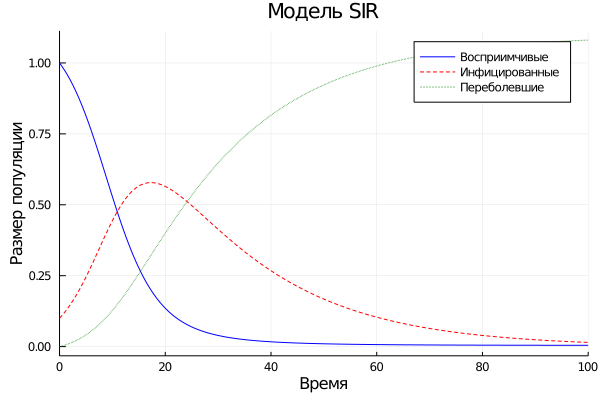

In [20]:
plot(sol, label = ["Восприимчивые" "Инфицированные" "Переболевшие"], color=["blue" "red" "green"], ls=[:solid :dash :dot],
    title="Модель SIR",
    xaxis="Время",yaxis="Размер популяции")

┌ Info: Saved animation to 
│   fn = /Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/SIR.gif
└ @ Plots /Users/anastasia/.julia/packages/Plots/YdauZ/src/animation.jl:104


Plots.AnimatedGif("/Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/SIR.gif")
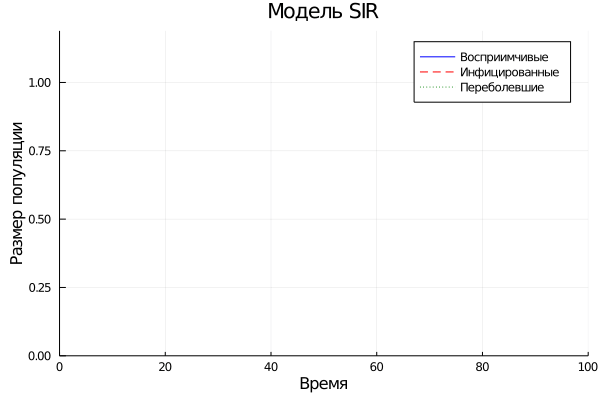

In [21]:
animate(sol, fps=7, "SIR.gif", label = ["Восприимчивые" "Инфицированные" "Переболевшие"], 
    color=["blue" "red" "green"], ls=[:solid :dash :dot], title="Модель SIR",
    xaxis="Время",yaxis="Размер популяции")

### 4. Как расширение модели SIR (Susceptible-Infected-Removed) по результатом эпидемии испанки была предложена модель SEIR (Susceptible-Exposed-Infected-Removed):

In [22]:
M = 1.0

# задаём описание модели:
lv! = @ode_def SEIR begin
ds = -(β/M)*s*i
de = (β/M)*s*i - δ*e
di = δ*e - γ*i
dr = γ*i
end β γ δ

initialInfect = 0.1
# задаём начальное условие:
u0 = [(M - initialInfect), 0.0, initialInfect, 0.0]
# задаём знанчения параметров:
p = (0.6, 0.2, 0.1)
# задаём интервал времени:
tspan = (0.0, 100.0)

# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 25-element Array{Float64,1}:
   0.0
   0.024423707511123237
   0.2198399425095939
   0.6724471660709395
   1.343312585078274
   2.2048549843871585
   3.3192000814261293
   4.6859854352737536
   6.3524579925856735
   8.357307405301253
  10.77990033301068
  13.70833185188398
  17.24776341152023
  21.41899285836336
  26.11588475544062
  31.347134254122864
  37.434271296458384
  45.570284140446496
  51.928238600094865
  59.56907860461843
  67.00368574576514
  75.3507910736516
  84.11523085894648
  93.80032438593666
 100.0
u: 25-element Array{Array{Float64,1},1}:
 [0.9, 0.0, 0.1, 0.0]
 [0.8986852898870974, 0.0013131042225504332, 0.09951432022141568, 0.000487285668936548]
 [0.8884555126317857, 0.011417352765168885, 0.09582373887672196, 0.004303395726323571]
 [0.8665273483391872, 0.03234298622673409, 0.08849596775550998, 0.012633697678568883]
 [0.8376685954526962, 0.058135907360034815, 0.08027142577005933, 0.0239240714

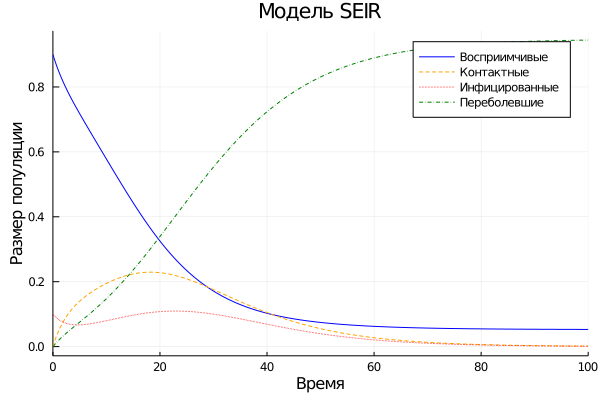

In [23]:
plot1 = plot(sol, label = ["Восприимчивые" "Контактные" "Инфицированные" "Переболевшие"], 
    color=["blue" "orange" "red" "green"], ls=[:solid :dash :dot :dashdot],
    title="Модель SEIR",
    xaxis="Время",yaxis="Размер популяции")

┌ Info: Saved animation to 
│   fn = /Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/SEIR.gif
└ @ Plots /Users/anastasia/.julia/packages/Plots/YdauZ/src/animation.jl:104


Plots.AnimatedGif("/Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/SEIR.gif")
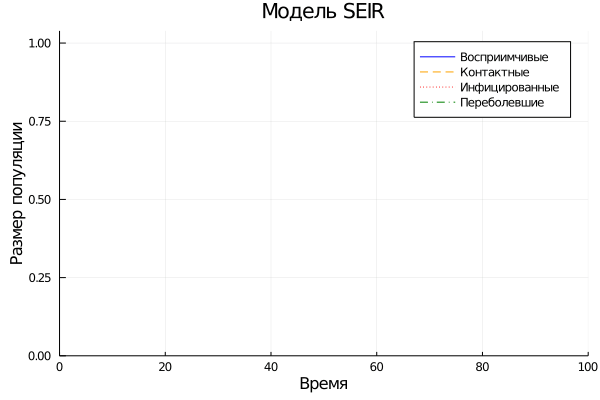

In [24]:
animate(sol, fps=7, "SEIR.gif", label = ["Восприимчивые" "Контактные" "Инфицированные" "Переболевшие"], 
    color=["blue" "orange" "red" "green"], ls=[:solid :dash :dot :dashdot],
    title="Модель SEIR",
    xaxis="Время",yaxis="Размер популяции")

### 5. Для дискретной модели Лотки–Вольтерры:

In [25]:
using DifferentialEquations, Plots, ParameterizedFunctions, LaTeXStrings

# задаём знанчения параметров:
a, c, d = 2, 1, 5

# задаем функцию для дискретной модели 
next(x1, x2) = [(a*x1*(1 - x1) - x1*x2), (-c*x2 + d*x1*x2)]

# рассчитываем точку равновесия 
balancePoint = [(1 + c)/d ,(d*(a - 1)-a*(1 + c))/d]

# задаём начальное условие:
u0 = [0.8, 0.05]
modelingTime = 100

simTrajectory = Array{Union{Nothing, Array}}(nothing, modelingTime)

for t in 1:modelingTime
    simTrajectory[t] = []
    if(t == 1)
        simTrajectory[t] = u0
    else
        simTrajectory[t] = next(simTrajectory[t-1]...)
    end
end

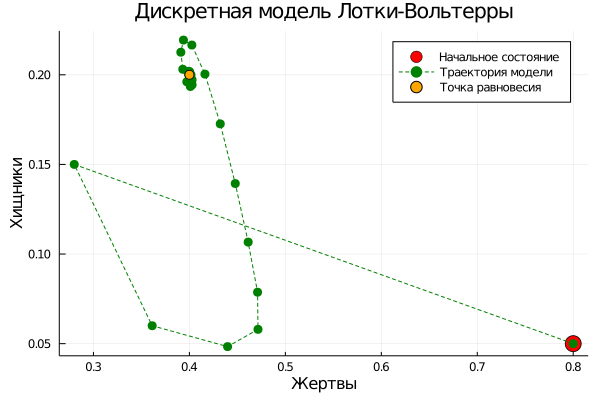

In [26]:
scatter([simTrajectory[1][1]], [simTrajectory[1][2]], 
    c=:red, ms=9, label="Начальное состояние")

plot!(first.(simTrajectory), last.(simTrajectory), color=:green, linestyle=:dash, 
    marker = (:dot, 5, Plots.stroke(0)), label="Траектория модели", title = "Дискретная модель Лотки-Вольтерры")

scatter!([balancePoint[1]], [balancePoint[2]], color=:orange, markersize=5, 
    label="Точка равновесия", 
    xlabel="Жертвы", ylabel="Хищники")

┌ Info: Saved animation to 
│   fn = /Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/LotkaVolterra.gif
└ @ Plots /Users/anastasia/.julia/packages/Plots/YdauZ/src/animation.jl:104


Plots.AnimatedGif("/Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/LotkaVolterra.gif")
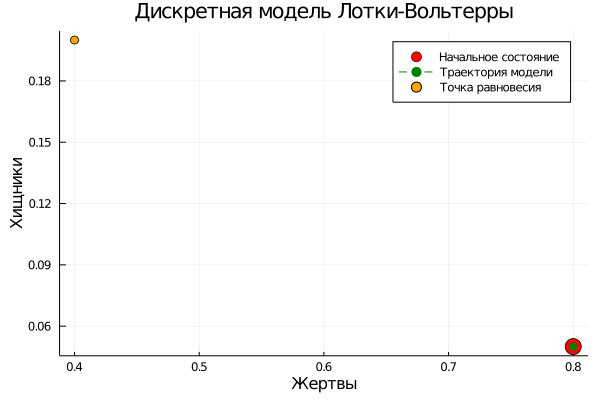

In [27]:
n = 100
anim = @animate for i in 1:n
    modelingTime = (i)
    # задаём значения параметров:
    a, c, d = 2, 1, 5
    # задаём начальное условие:
    u0 = [0.8, 0.05]
    
    simTrajectory = Array{Union{Nothing, Array}}(nothing, modelingTime)

    for t in 1:modelingTime
        simTrajectory[t] = []
        if(t == 1)
            simTrajectory[t] = u0
        else
            simTrajectory[t] = next(simTrajectory[t-1]...)
        end
    end
    
    scatter([simTrajectory[1][1]], [simTrajectory[1][2]], 
    c=:red, ms=9, label="Начальное состояние")
    
    plot!(first.(simTrajectory), last.(simTrajectory), color=:green, linestyle=:dash, 
    marker = (:dot, 5, Plots.stroke(0)), label="Траектория модели",
    title = "Дискретная модель Лотки-Вольтерры", xlabel="Жертвы", ylabel="Хищники")
    
    scatter!([balancePoint[1]], [balancePoint[2]], color=:orange, markersize=5, 
    label="Точка равновесия", 
    xlabel="Жертвы", ylabel="Хищники")
end
gif(anim, "LotkaVolterra.gif", fps=7)

### 6. Реализовать на языке Julia модель отбора на основе конкурентных отношений:

In [28]:
# задаём описание модели:
lv! = @ode_def CompetitiveSelectionModel begin
dx = a*x - b*x*y
dy = a*y - b*x*y
    end a b

# задаём начальное условие:
u0 = [1.0, 1.4]
# задаём знанчения параметров:
p = (0.5, 0.2)
# задаём интервал времени:
tspan = (0.0, 10.0)

# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 20-element Array{Float64,1}:
  0.0
  0.13063515958673816
  0.6620095561151518
  1.4745519415890072
  2.3842742640597665
  3.4538268365585263
  4.5626734308161065
  5.6783940845777625
  6.618742323996988
  7.174117629557126
  7.581652134740393
  7.907287332214164
  8.211743099105075
  8.476131089727069
  8.723933694057362
  8.96149300216553
  9.203605417155766
  9.457562737635275
  9.735425792568117
 10.0
u: 20-element Array{Array{Float64,1},1}:
 [1.0, 1.4]
 [1.028414415994334, 1.4554136105342876]
 [1.1349867878063837, 1.6919333641656147]
 [1.2538768548488464, 2.0899703058711037]
 [1.2907022936785661, 2.608347196451814]
 [1.1633366007475396, 3.4126416493413063]
 [0.8307913694023051, 4.746684173355672]
 [0.3930028424288755, 7.233787035234246]
 [0.11653311934280954, 11.06364992846164]
 [0.03764045312170033, 14.488642594432175]
 [0.01249183553350078, 17.729604986829926]
 [0.004202667929468129, 20.85409149286473]
 [0

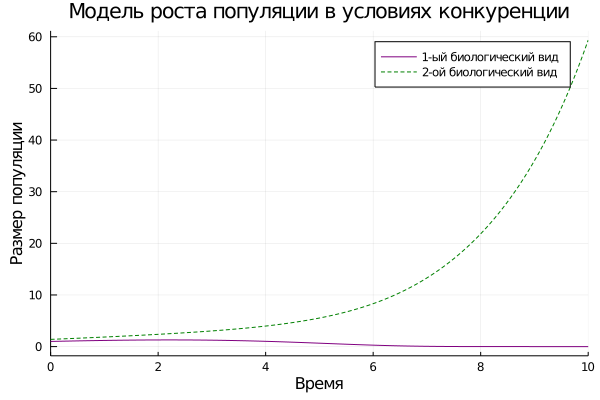

In [29]:
plot(sol, label = ["1-ый биологический вид" "2-ой биологический вид"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель роста популяции в условиях конкуренции",
    xaxis="Время",yaxis="Размер популяции")

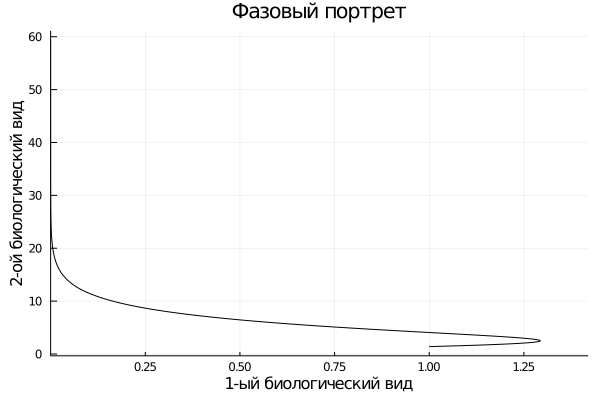

In [30]:
# фазовый портрет:
plot(sol, vars=(1,2), color="black", title="Фазовый портрет", 
    xaxis="1-ый биологический вид", yaxis="2-ой биологический вид", legend=false)

┌ Info: Saved animation to 
│   fn = /Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/CompetitiveSelectionModel.gif
└ @ Plots /Users/anastasia/.julia/packages/Plots/YdauZ/src/animation.jl:104


Plots.AnimatedGif("/Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/CompetitiveSelectionModel.gif")
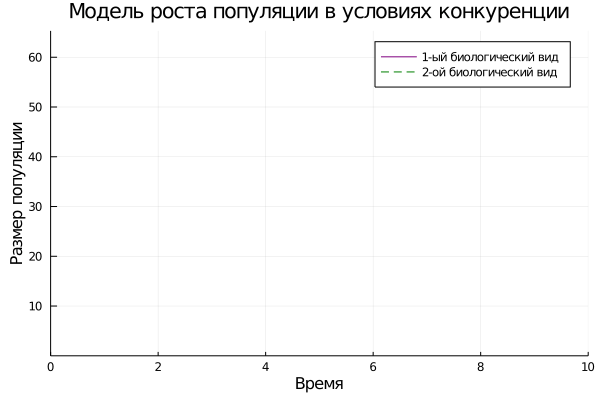

In [31]:
animate(sol, fps=7, "CompetitiveSelectionModel.gif", label = ["1-ый биологический вид" "2-ой биологический вид"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель роста популяции в условиях конкуренции",
    xaxis="Время",yaxis="Размер популяции")

### 7. Реализовать на языке Julia модель консервативного гармонического осциллятора

In [32]:
# задаём описание модели:
lv! = @ode_def classicOscillator begin
dx = y
dy = -(w0^2)*x
end w0

# задаём начальное условие:
u0 = [1.0, 1.0]
# задаём знанчения параметров:
p = (2.0)
# задаём интервал времени:
tspan = (0.0, 10.0)

# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 31-element Array{Float64,1}:
  0.0
  0.07580097943195412
  0.2069885812216689
  0.35309669557584694
  0.5285194634228536
  0.7514913983307518
  1.007208076437168
  1.2779918739701663
  1.5687718429414093
  1.902676294968318
  2.2229735628434524
  2.5850538597753427
  2.952699559134839
  ⋮
  5.742943903730911
  6.171923680145046
  6.584585638714117
  7.010469575802823
  7.433067310856991
  7.849769652855734
  8.282275467285212
  8.684259561485183
  9.126171129123518
  9.524168428874143
  9.970146725929531
 10.0
u: 31-element Array{Array{Float64,1},1}:
 [1.0, 1.0]
 [1.0640413705392677, 0.6864865930281919]
 [1.1166550813709244, 0.11102078370062098]
 [1.0853087396797187, -0.5370470078797774]
 [0.9269048870800588, -1.2503554234259173]
 [0.5666113099065992, -1.9276424532442582]
 [0.022386871181484466, -2.235619674928955]
 [-0.5570282018202967, -1.9387834672777762]
 [-0.9979738369470429, -1.0080692375841707]
 [-1.09572

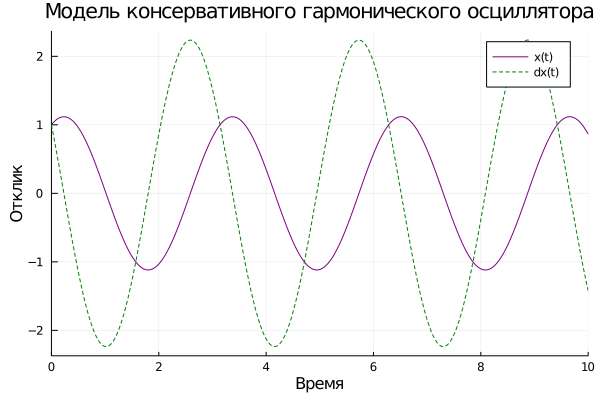

In [33]:
plot(sol, label = ["x(t)" "dx(t)"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель консервативного гармонического осциллятора",
    xaxis="Время",yaxis="Отклик")

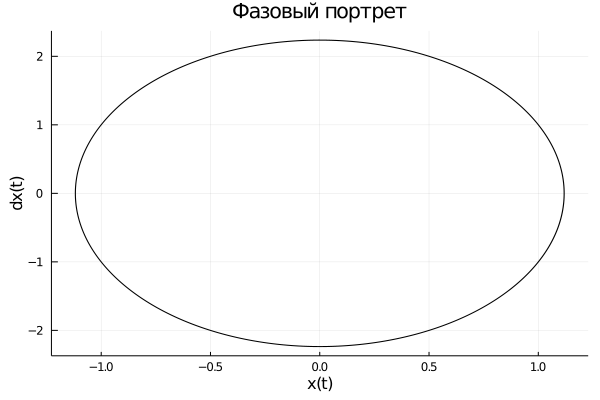

In [34]:
# фазовый портрет:
plot(sol, vars=(1,2), color="black", title="Фазовый портрет", xaxis="x(t)", yaxis="dx(t)", legend=false)

┌ Info: Saved animation to 
│   fn = /Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/harmonic_oscillator_model.gif
└ @ Plots /Users/anastasia/.julia/packages/Plots/YdauZ/src/animation.jl:104


Plots.AnimatedGif("/Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/harmonic_oscillator_model.gif")
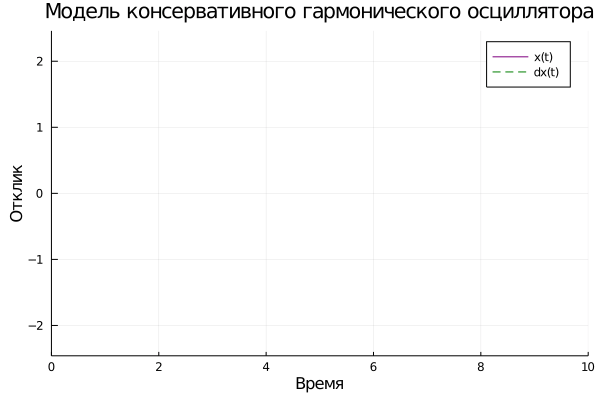

In [35]:
animate(sol, fps=7, "harmonic_oscillator_model.gif", label = ["x(t)" "dx(t)"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель консервативного гармонического осциллятора",
    xaxis="Время",yaxis="Отклик")

### 8. Реализовать на языке Julia модель свободных колебаний гармонического осциллятора

In [36]:
# задаём описание модели:
lv! = @ode_def Oscillator begin
dx = y
dy = -2*v*y - (w0^2)*x
end v w0

# задаём начальное условие:
u0 = [0.5, 1.0]
# задаём знанчения параметров:
p = (0.5, 2.0)
# задаём интервал времени:
tspan = (0.0, 10.0)

# решение:
prob = ODEProblem(lv!,u0,tspan,p)
sol = solve(prob)

retcode: Success
Interpolation: automatic order switching interpolation
t: 31-element Array{Float64,1}:
  0.0
  0.07472295275624102
  0.2111474073618621
  0.3709981031314561
  0.5569932278725439
  0.7935650701545781
  1.0592493619908256
  1.3434676481751908
  1.6345589338447766
  1.969577082369631
  2.2987257554955125
  2.6637690409750396
  3.036321896353611
  ⋮
  5.7371152023935705
  6.172863569625527
  6.563858142109736
  6.984119749940885
  7.373364961737517
  7.815552860164412
  8.212080053058667
  8.639452678126846
  9.029650751134675
  9.479283489991738
  9.877714129664202
 10.0
u: 31-element Array{Array{Float64,1},1}:
 [0.5, 1.0]
 [0.566294838471426, 0.7739308462880993]
 [0.6437437851223823, 0.3637766487994777]
 [0.665622626864566, -0.08049770770465431]
 [0.6094379303478177, -0.5035079249410964]
 [0.4452831660556267, -0.8447597772659111]
 [0.2009911000742908, -0.946244317432289]
 [-0.04954799208080904, -0.7771790866483171]
 [-0.22751017563620535, -0.42798006554022755]
 [-0.29627

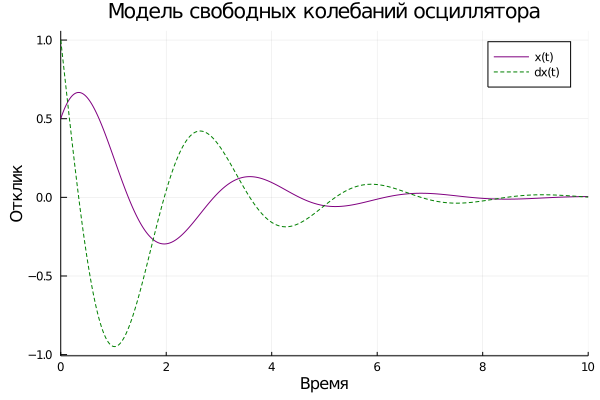

In [37]:
plot(sol, label = ["x(t)" "dx(t)"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель свободных колебаний осциллятора",
    xaxis="Время",yaxis="Отклик")

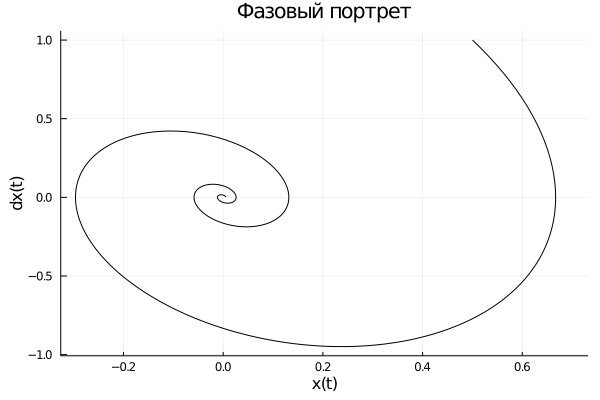

In [38]:
# фазовый портрет:
plot(sol, vars=(1,2), color="black",  title="Фазовый портрет", xaxis="x(t)", yaxis="dx(t)", legend=false)

┌ Info: Saved animation to 
│   fn = /Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/oscillator_2.gif
└ @ Plots /Users/anastasia/.julia/packages/Plots/YdauZ/src/animation.jl:104


Plots.AnimatedGif("/Users/anastasia/Desktop/Учеба универ/Практикум по телекоммуникациям/6 lab/oscillator_2.gif")
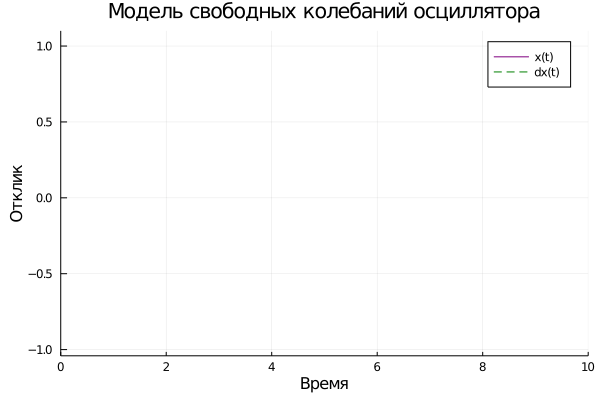

In [39]:
animate(sol, fps=7, "oscillator_2.gif", label = ["x(t)" "dx(t)"], color=["purple" "green"], ls=[:solid :dash], 
    title="Модель свободных колебаний осциллятора",
    xaxis="Время",yaxis="Отклик")